# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler

In [26]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MeanShift

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [38]:
allen = pd.read_csv("Dataset.csv")

In [39]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
allen.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
allen.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# Label Encoding

In [42]:
l1 = preprocessing.LabelEncoder()
f1 = l1.fit_transform(allen['Gender']) 
f1 = pd.DataFrame(data=f1, columns=['Gender'])

In [43]:
print(list(l1.inverse_transform([0,1])))

['Female', 'Male']


In [44]:
alvin = allen
alvin['Gender'] = f1['Gender']

In [46]:
allen.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Analysis

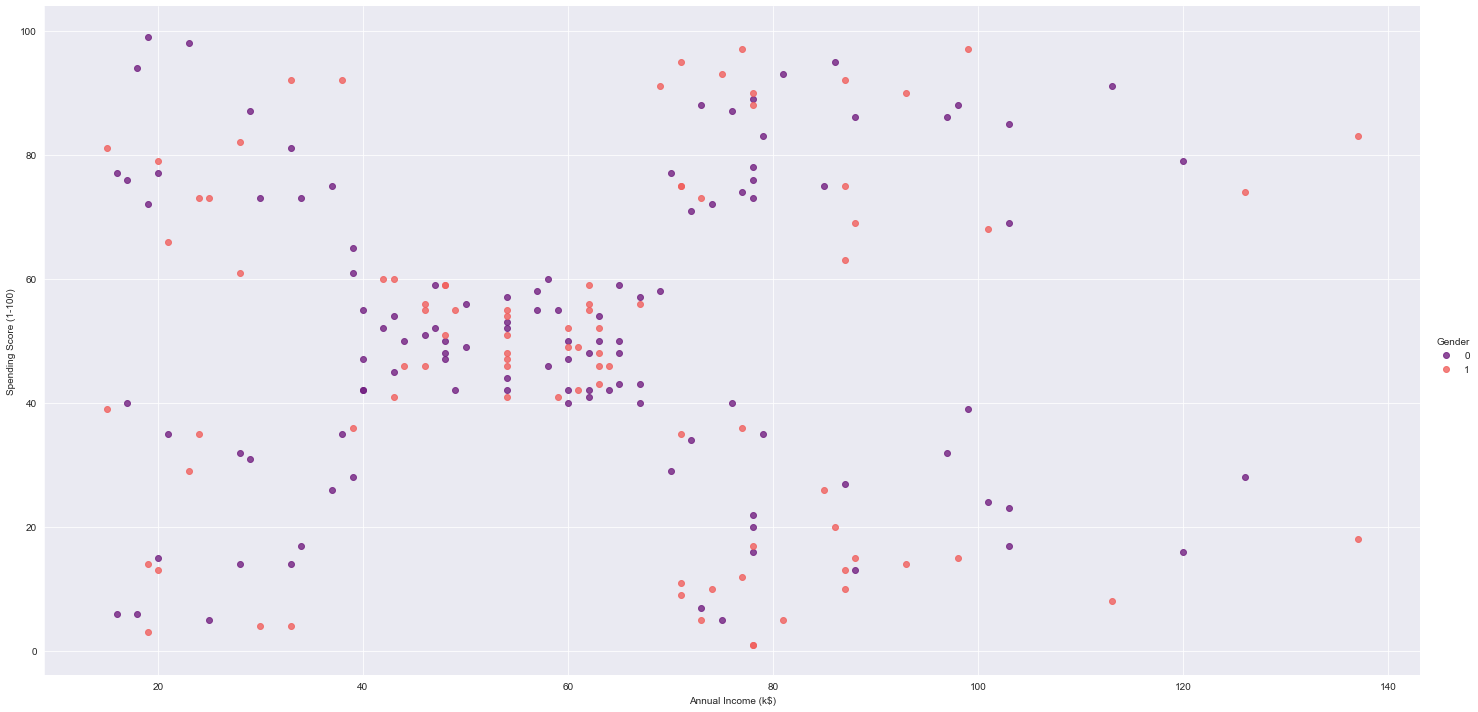

In [23]:
sns.set_style('darkgrid')
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=allen, hue='Gender',
           palette='magma', size=10, aspect=2, fit_reg=False)

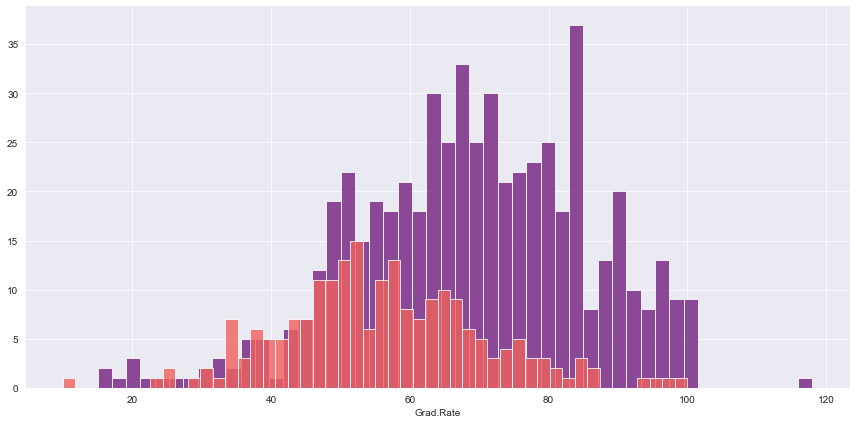

In [184]:
sns.set_style('darkgrid')
g1 = sns.FacetGrid(allen,hue="Private",palette='magma',size=6,aspect=2)
g1 = g1.map(plt.hist,'Grad.Rate',bins=50,alpha=0.8)

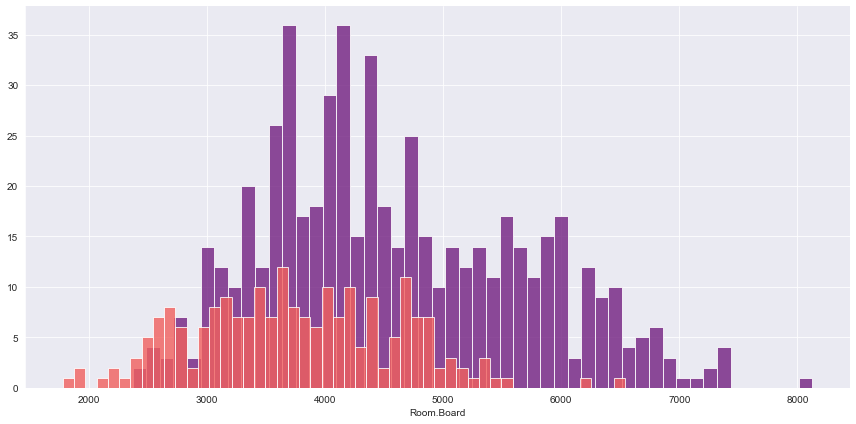

In [185]:
sns.set_style('darkgrid')
g2 = sns.FacetGrid(allen,hue="Private",palette='magma',size=6,aspect=2)
g2 = g2.map(plt.hist,'Room.Board',bins=50,alpha=0.8)

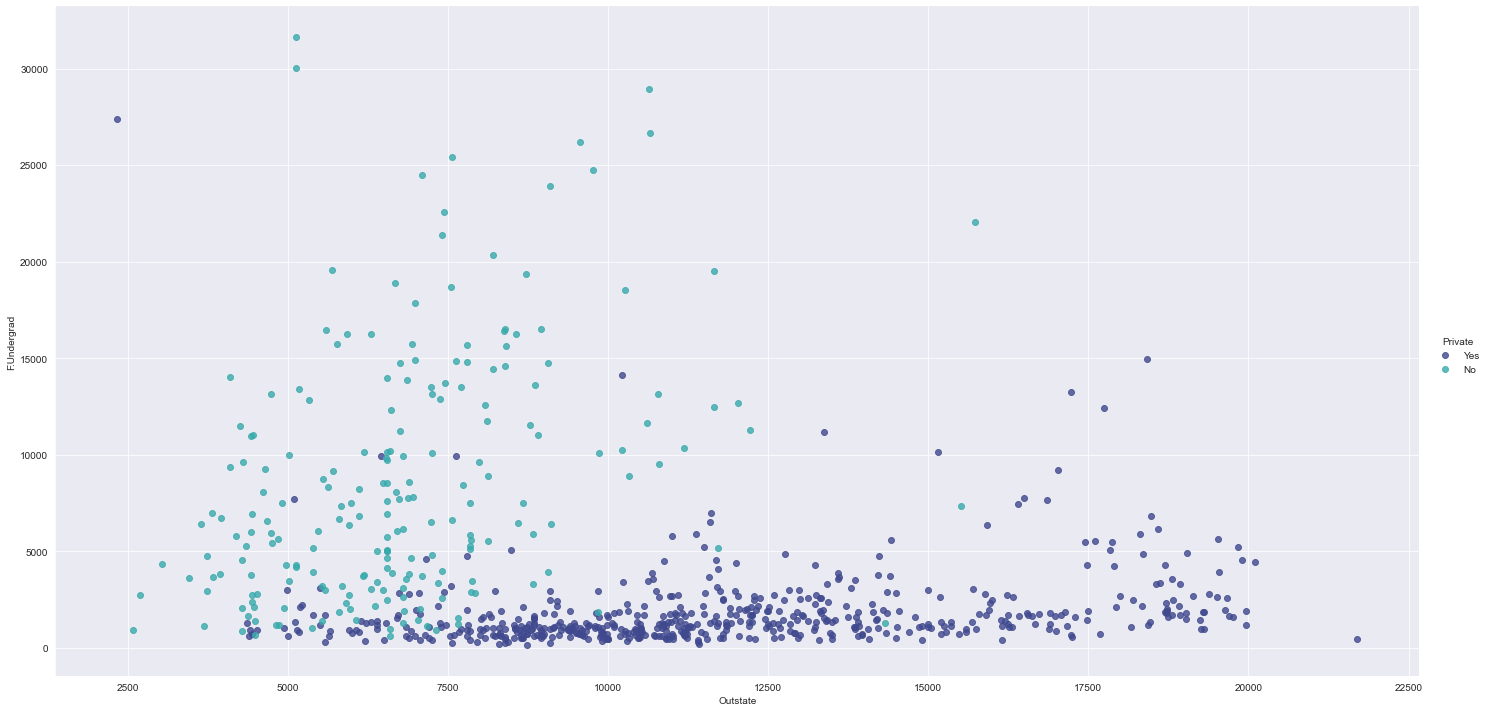

In [186]:
sns.set_style('darkgrid')
sns.lmplot('Outstate','F.Undergrad',data=allen,hue='Private',
           palette='mako',size=10,aspect=2,fit_reg=False)

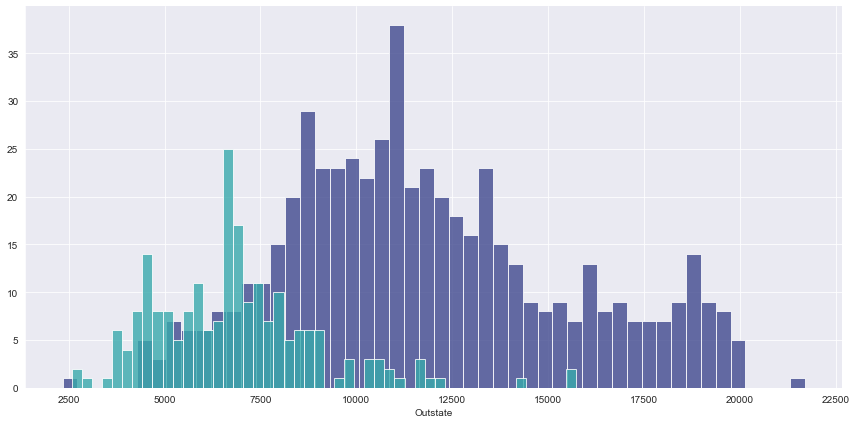

In [187]:
sns.set_style('darkgrid')
g3 = sns.FacetGrid(allen,hue="Private",palette='mako',size=6,aspect=2)
g3 = g3.map(plt.hist,'Outstate',bins=50,alpha=0.8)

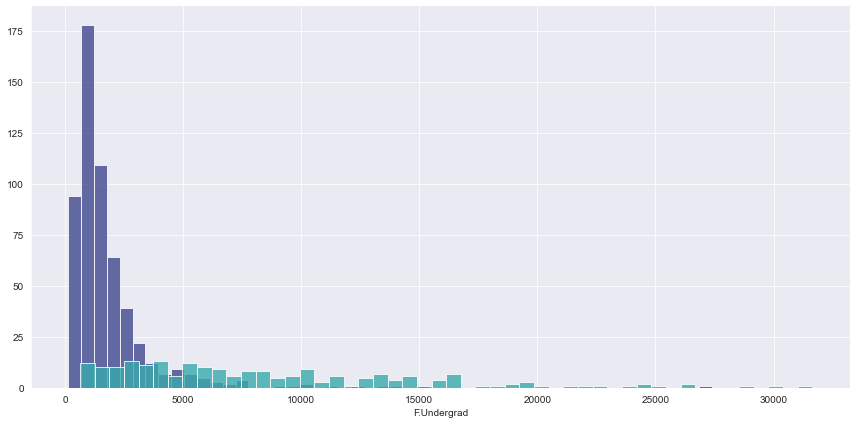

In [188]:
sns.set_style('darkgrid')
g4 = sns.FacetGrid(allen,hue="Private",palette='mako',size=6,aspect=2)
g4 = g4.map(plt.hist,'F.Undergrad',bins=50,alpha=0.8)

In [189]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

# K-Means

In [190]:
model1 = KMeans(n_clusters = 2)
model1.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

KMeans(n_clusters=2)

In [191]:
model1.cluster_centers_


array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [192]:
allen1 = allen
allen1['Cluster'] = allen['Private'].apply(converter)

In [193]:
allen1.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix 

In [194]:
print(confusion_matrix(allen1['Cluster'],model1.labels_))

[[138  74]
 [531  34]]


### Classification Report

In [195]:
print(classification_report(allen1['Cluster'],model1.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



### Accuracy

In [196]:
c1 = confusion_matrix(allen1['Cluster'],model1.labels_)
print('Accuracy: {:.2%}'.format((c1[0,0]+c1[1,1])/sum(sum(c1))))

Accuracy: 22.14%


### F1 Score

In [197]:
f11 = f1_score(allen1['Cluster'],model1.labels_)
print('F1 Score: {:.2%}'.format(f11))

F1 Score: 10.10%


### Save

In [206]:
allen11 = pd.DataFrame({'Model':'K-Means',
                      'Accuracy':[(c1[0,0]+c1[1,1])/sum(sum(c1))*100],
                      'F1 Score':[f11*100]})

In [207]:
allen11.head()

,Model,Accuracy,F1 Score
0,K-Means,22.136422,10.104012


# Birch

In [238]:
model2 = Birch(branching_factor = 2, n_clusters = 2, threshold = 10)
model2.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

Birch(branching_factor=2, n_clusters=2, threshold=10)

In [239]:
allen2 = allen
allen2['Cluster'] = allen['Private'].apply(converter)

In [240]:
allen2.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix 

In [241]:
print(confusion_matrix(allen2['Cluster'],model2.labels_))

[[ 68 144]
 [554  11]]


### Classification Report

In [242]:
print(classification_report(allen2['Cluster'],model2.labels_))

              precision    recall  f1-score   support

           0       0.11      0.32      0.16       212
           1       0.07      0.02      0.03       565

    accuracy                           0.10       777
   macro avg       0.09      0.17      0.10       777
weighted avg       0.08      0.10      0.07       777



### Accuracy

In [243]:
c2 = confusion_matrix(allen2['Cluster'],model2.labels_)
print('Accuracy: {:.2%}'.format((c2[0,0]+c2[1,1])/sum(sum(c2))))

Accuracy: 10.17%


### F1 Score

In [244]:
f12 = f1_score(allen2['Cluster'],model2.labels_)
print('F1 Score: {:.2%}'.format(f12))

F1 Score: 3.06%


### Save

In [245]:
allen12 = pd.DataFrame({'Model':'Birch',
                      'Accuracy':[(c2[0,0]+c2[1,1])/sum(sum(c2))*100],
                      'F1 Score':[f12*100]})

In [246]:
allen12.head()

,Model,Accuracy,F1 Score
0,Birch,10.16731,3.055556


# FeatureAgglomeration

In [295]:
model3 = FeatureAgglomeration(n_clusters = None, distance_threshold = 2)
model3.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

FeatureAgglomeration(distance_threshold=2, n_clusters=None)

In [296]:
allen3 = allen
allen3['Cluster'] = allen['Private'].apply(converter)

In [297]:
allen3.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix

In [ ]:
print(confusion_matrix(allen3['Cluster'],model3.labels_))

### Classification Report

In [ ]:
print(classification_report(allen3['Cluster'],model3.labels_))

### Accuracy

In [71]:
c3 = confusion_matrix(ytest,p3)
print('Accuracy: {:.2%}'.format((c3[0,0]+c3[1,1])/sum(sum(c3))))

Accuracy: 90.00%


### F1 Score

In [72]:
f13 = f1_score(ytest,p3)
print('F1 Score: {:.2%}'.format(f13))

F1 Score: 84.21%


### Save

In [ ]:
allen13 = pd.DataFrame({'Model':'Feature Agglomeration',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen13.head()

# MeanShift

In [73]:
model4 = KNeighborsClassifier()
model4.fit(xtrain,ytrain)
p4 = model4.predict(xtest)

### Confusion Matrix

In [74]:
print(confusion_matrix(ytest,p4))

[[36  2]
 [10 12]]


### Accuracy

In [76]:
c4 = confusion_matrix(ytest,p4)
print('Accuracy: {:.2%}'.format((c4[0,0]+c4[1,1])/sum(sum(c4))))

Accuracy: 80.00%


### F1 Score

In [77]:
f14 = f1_score(ytest,p4)
print('F1 Score: {:.2%}'.format(f14))

F1 Score: 66.67%


### Save

In [ ]:
allen14 = pd.DataFrame({'Model':'Mean Shift',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen14.head()

# Concat

In [183]:
al = pd.concat([allen11,allen12,allen13,allen14],axis=0).reset_index()
al = al.drop('index',axis=1)
al

,Model,Accuracy,Precision,F1 Score
0,Random Forest,0.882353,0.812629,0.851371
1,Decision Tree,0.876471,0.850546,0.836372
2,Naive Bayes,0.876471,0.857514,0.816352
3,K-Nearest Neighbour,0.805882,0.798139,0.689109
4,Logistic Regression,0.644118,NA,0.000000
